<center>
<img src="./pict/panda_logo_ts.png">
<br />
<br />

In [4]:
import datetime # для работы со временем 

import numpy as np # уже знакомые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

TimeStamp - базовый объект времени в Pandas

In [5]:
datetime.datetime(2020, 1, 1) # основное представление времени в Python

datetime.datetime(2020, 1, 1, 0, 0)

In [6]:
pd.to_datetime('01.01.2020') # Timestamp - Pandas эквивалент для datetime Python

Timestamp('2020-01-01 00:00:00')

In [4]:
pd.Timestamp(datetime.datetime(2020, 1, 1)) # явное приведение типов

Timestamp('2020-01-01 00:00:00')

In [5]:
pd.Timestamp.min, pd.Timestamp.max # ограничения

(Timestamp('1677-09-21 00:12:43.145225'),
 Timestamp('2262-04-11 23:47:16.854775807'))

In [6]:
pd.NaT # аналог np.nan, None и т.д.

NaT

In [7]:
pd.NaT is pd.NaT

True

Date Time Index - временной индекс 

In [7]:
# Date Time Index
dti = pd.to_datetime(['01.01.2020', 'Jan 1, 2020', 
                      np.datetime64('2020-01-01'),   
                      datetime.datetime(2020, 1, 1), None])  # разные типы времени -> pandas date-time-index
dti

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [9]:
type(dti[0]) # каждый элемент - TimeStamp

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
dti[-1] == dti[-1] # Nat != Nat

False

In [11]:
pd.to_datetime(['01-03-2020 10:00'], dayfirst=True)

DatetimeIndex(['2020-03-01 10:00:00'], dtype='datetime64[ns]', freq=None)

In [12]:
pd.to_datetime(['01-20-2020', '01-03-2020'], dayfirst=True) # не строго

DatetimeIndex(['2020-01-20', '2020-03-01'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime('03-01-2020 05:30', format='%d-%m-%Y %H:%M') # явный формат даты

Timestamp('2020-01-03 05:30:00')

In [14]:
pd.to_datetime(['2009/07/31', 'test']) # ошибка

ParserError: Unknown string format: test

In [8]:
not_dti = pd.to_datetime(['2009/07/31', 'test'], errors='ignore') # пути обхода
not_dti[0]

'2009/07/31'

In [16]:
dti1 = pd.to_datetime(['2009/07/31', 'test'], errors='coerce') # все что не распарсилось в NaT
dti1

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
# можно еще и так, DataFrame -> datetime

df = pd.DataFrame({'year': [2020, 2020],
                   'month': [1, 3],
                   'day': [3, 5],
                   'hour': [2, 3]})

pd.to_datetime(df)

0   2020-01-03 02:00:00
1   2020-03-05 03:00:00
dtype: datetime64[ns]

In [18]:
pd.date_range(start='2020-01-01', end='2020-01-02', freq='H') # генерация date time индекса через частоту

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
pd.date_range('2020-01-01', '2020-01-05', periods=10) # через количество периодов

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 10:40:00',
               '2020-01-01 21:20:00', '2020-01-02 08:00:00',
               '2020-01-02 18:40:00', '2020-01-03 05:20:00',
               '2020-01-03 16:00:00', '2020-01-04 02:40:00',
               '2020-01-04 13:20:00', '2020-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Временной ряд: соотвествие time - value

In [10]:
ts = pd.Series(np.random.randint(0, 100, size=100), 
          index=pd.date_range('2020-01-01', periods=100, freq='D')) 
ts.head()

2020-01-01    85
2020-01-02    52
2020-01-03    33
2020-01-04    30
2020-01-05     9
Freq: D, dtype: int64

<AxesSubplot:xlabel='TRADEDATE'>

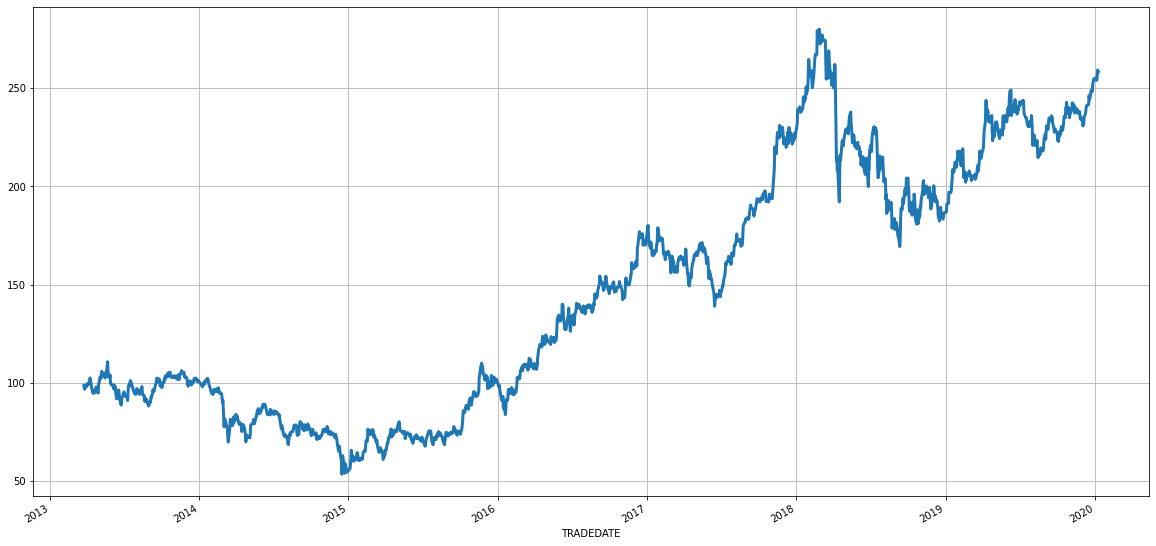

In [11]:
ts = pd.read_csv('./data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [12]:
ts['2019-12-02':'2019-12-27'] # можно делать slice, крайние точки включены

TRADEDATE
2019-12-02    233.77
2019-12-03    230.66
2019-12-04    231.59
2019-12-05    231.71
2019-12-06    235.14
2019-12-09    237.04
2019-12-10    237.91
2019-12-11    240.32
2019-12-12    241.05
2019-12-13    241.21
2019-12-16    241.45
2019-12-17    241.60
2019-12-18    246.20
2019-12-19    244.00
2019-12-20    244.71
2019-12-23    248.80
2019-12-24    248.67
2019-12-25    248.04
2019-12-26    248.24
2019-12-27    252.06
Name: CLOSE, dtype: float64

In [13]:
ts.index.resolution # расширение

'day'

In [17]:
ts # и так, потому что 2020-01 больше чем resolution индекса

TRADEDATE
2013-03-25     98.79
2013-03-26     97.20
2013-03-27     96.75
2013-03-28     98.59
2013-03-29     98.76
               ...  
2020-01-03    255.00
2020-01-06    253.90
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Name: CLOSE, Length: 1712, dtype: float64

In [25]:
ts['2017':'2020-01-03'] # и так 

TRADEDATE
2017-01-03    180.12
2017-01-04    175.95
2017-01-05    171.90
2017-01-06    170.69
2017-01-09    168.35
               ...  
2019-12-25    248.04
2019-12-26    248.24
2019-12-27    252.06
2019-12-30    254.75
2020-01-03    255.00
Name: CLOSE, Length: 759, dtype: float64

Встроенный календарь Pandas

In [28]:
ts.index[2]#.day_name() # день недели

Timestamp('2013-03-27 00:00:00')

In [ ]:
friday = (ts.index[2] + pd.Timedelta('2D')) # Time delta
friday.day_name()

In [ ]:
friday 

In [ ]:
monday = friday + pd.offsets.BusinessDay() # offset умнее time delta
monday.day_name()

In [ ]:
friday + pd.offsets.BusinessDay() 

In [ ]:
stamp = pd.Timestamp('2020-01-04 00:00:00')
print(stamp.day_name())
offset = pd.offsets.BusinessHour(start='09:00', end='18:00')

offset.rollforward(stamp) # перемещаемся между рабочими часами без их прибавления, так же есть - rollback

In [ ]:
offset.rollforward(stamp).day_name() 

In [ ]:
stamp + offset # перейдет на понедельник и прибавит бизнес час

In [ ]:
(stamp + offset).normalize() # нормализация даты

In [ ]:
stamp + pd.offsets.Week(weekday=4) # offset с параметризацией

In [ ]:
(stamp + pd.offsets.Week(weekday=4)).weekday() 

In [ ]:
(stamp + pd.offsets.Week(weekday=4)).day_name()

In [ ]:
dti

In [ ]:
dti + pd.offsets.LastWeekOfMonth() # можно оперирировать сразу со всем date time index'ом

Календарь в Pandas можно (и нужно) кастомизировать

In [ ]:
# кастомизация рабочего дня

weekmask_egypt = 'Sun Mon Tue Wed Thu'
holidays = ['2012-05-01',
            datetime.datetime(2013, 5, 1),
            np.datetime64('2014-05-01')]

bday_egypt = pd.offsets.CustomBusinessDay(holidays=holidays,
                                          weekmask=weekmask_egypt)

dt = datetime.datetime(2013, 4, 30)

dt + 2 * bday_egypt

In [ ]:
pd.Timestamp(dt).day_name()

In [ ]:
(dt + 2 * bday_egypt).day_name()

In [ ]:
# генерация кастомного индекса рабочих дней

weekmask = 'Mon Wed Fri'
holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]
bdti = pd.bdate_range('2020-01-01', '2020-01-20', freq='C', weekmask=weekmask, holidays=holidays)
bdti

In [ ]:
# кастомизация рабочего часа

cbh = pd.offsets.CustomBusinessHour(start='10:00', weekmask='Tue Wed Thu Fri')
print((dti[0] + pd.Timedelta(days=-2)).day_name())
dti[0] + pd.Timedelta(days=-2) + cbh

In [ ]:
# кастомизация календаря

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day

class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2019, 12, 31)
    rules = [Holiday('Рабочая суббота', month=3, day=7, year=2020,
                     offset=Day(1))]
    
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                              calendar=RussianBusinessCalendar())

Встроенные методы работы с временными рядами

In [ ]:
ts.head() # только рабочие дни Московской Биржи

In [18]:
# преобразование частоты

ts.asfreq(pd.offsets.Day()) #.fillna(method='pad')

TRADEDATE
2013-03-25     98.79
2013-03-26     97.20
2013-03-27     96.75
2013-03-28     98.59
2013-03-29     98.76
               ...  
2020-01-06    253.90
2020-01-07       NaN
2020-01-08    259.15
2020-01-09    257.99
2020-01-10    258.19
Freq: D, Name: CLOSE, Length: 2483, dtype: float64

In [22]:
ts.resample('1W').mean()

TRADEDATE
2013-03-31     98.0180
2013-04-07     99.1760
2013-04-14    100.4340
2013-04-21     95.5100
2013-04-28     96.2320
                ...   
2019-12-15    239.5060
2019-12-22    243.5920
2019-12-29    249.1620
2020-01-05    254.8750
2020-01-12    257.3075
Freq: W-SUN, Name: CLOSE, Length: 355, dtype: float64

<AxesSubplot:xlabel='TRADEDATE'>

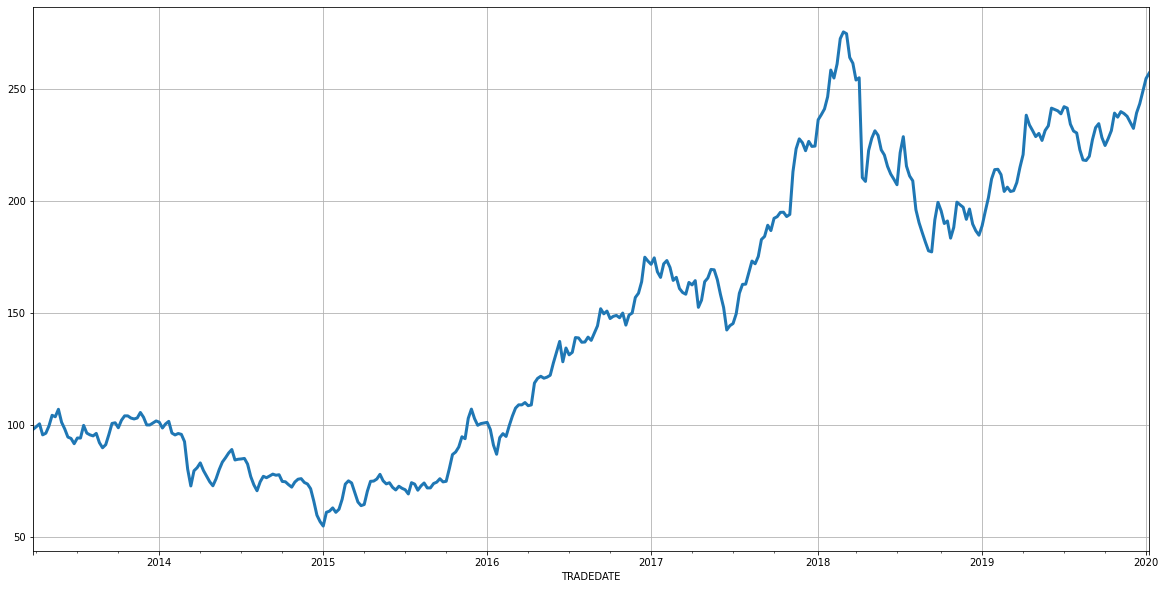

In [19]:
ts.resample('1W').mean().plot(figsize=(20, 10), linewidth=3, grid=True) # ресамплинг от дней к неделям

In [23]:
ts.resample('1W').agg([np.sum, np.mean, np.std]).head() # агрегации по временному индексу

,sum,mean,std
TRADEDATE,,,
2013-03-31,490.09,98.018,0.968334
2013-04-07,495.88,99.176,0.713358
2013-04-14,502.17,100.434,1.484025
2013-04-21,477.55,95.510,0.625220
2013-04-28,481.16,96.232,1.060269


In [24]:
ts.shift(5).head(10) # лаги

TRADEDATE
2013-03-25      NaN
2013-03-26      NaN
2013-03-27      NaN
2013-03-28      NaN
2013-03-29      NaN
2013-04-01    98.79
2013-04-02    97.20
2013-04-03    96.75
2013-04-04    98.59
2013-04-05    98.76
Name: CLOSE, dtype: float64

<AxesSubplot:xlabel='TRADEDATE'>

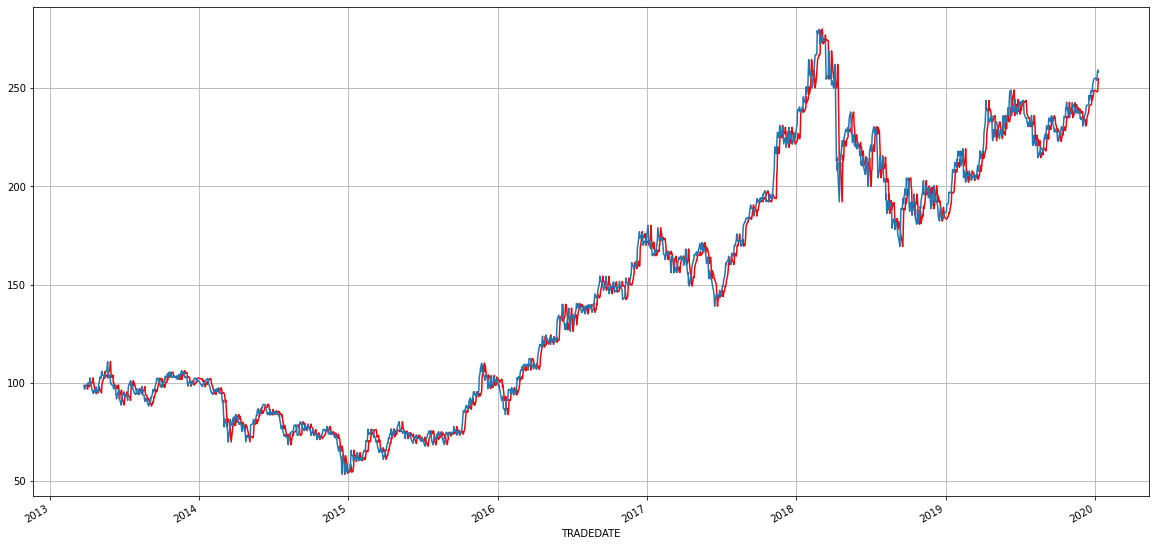

In [25]:
ts.shift(5).plot(figsize=(20, 10), color='red')
ts.plot(grid=True)

In [26]:
ts.asfreq('1D').fillna(method='ffill').shift(5, freq=pd.offsets.BDay()) # 5 лаг по рабочим дням,
                                                                # с выравниванием по дате

TRADEDATE
2013-04-01     98.79
2013-04-02     97.20
2013-04-03     96.75
2013-04-04     98.59
2013-04-05     98.76
               ...  
2020-01-13    253.90
2020-01-14    253.90
2020-01-15    259.15
2020-01-16    257.99
2020-01-17    258.19
Name: CLOSE, Length: 2483, dtype: float64

In [28]:
ts.rolling(window=5).mean() # скользящие статистики

TRADEDATE
2013-03-25        NaN
2013-03-26        NaN
2013-03-27        NaN
2013-03-28        NaN
2013-03-29     98.018
               ...   
2020-01-03    251.618
2020-01-06    252.790
2020-01-08    254.972
2020-01-09    256.158
2020-01-10    256.846
Name: CLOSE, Length: 1712, dtype: float64

In [29]:
rolling_mean = ts.rolling(window=5).mean().shift(1) 
rolling_max = ts.rolling(window=5).max().shift(1)
rolling_min = ts.rolling(window=5).min().shift(1)
rolling_std = ts.rolling(window=5).std().shift(1)

upper_bond = rolling_mean + 1.96 * rolling_std
lower_bond = rolling_mean - 1.96 * rolling_std

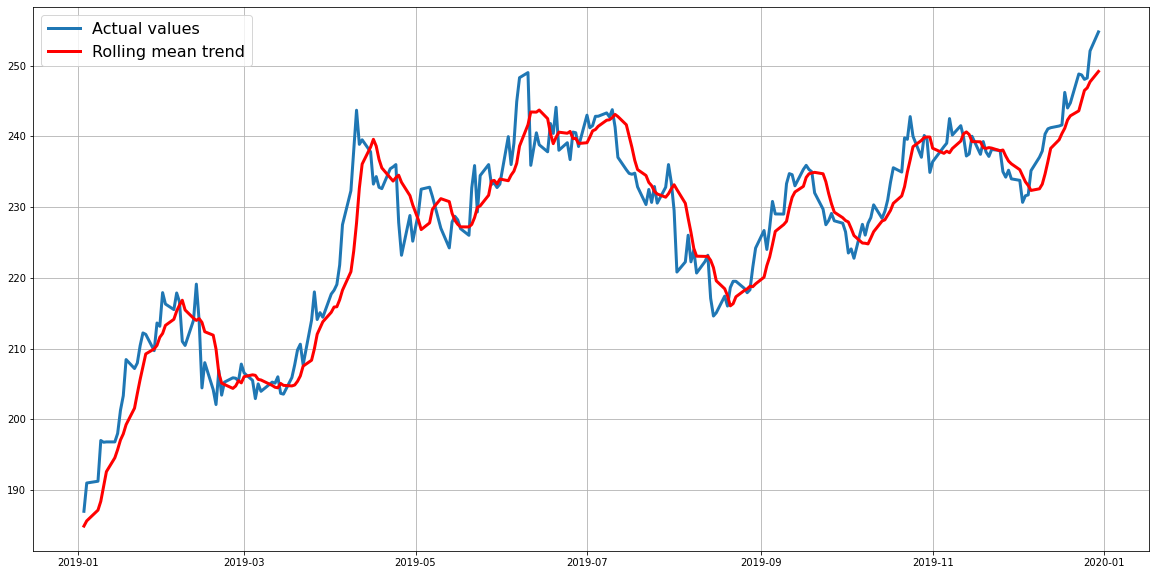

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_mean['2019'], "r", linewidth=3, label="Rolling mean trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

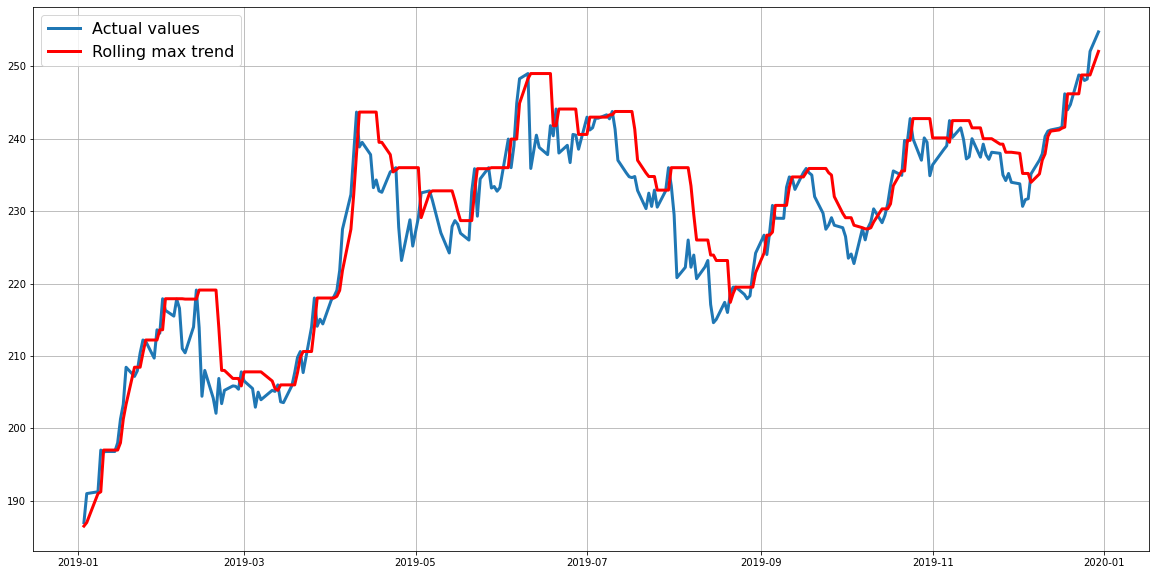

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_max['2019'], "r", linewidth=3, label="Rolling max trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

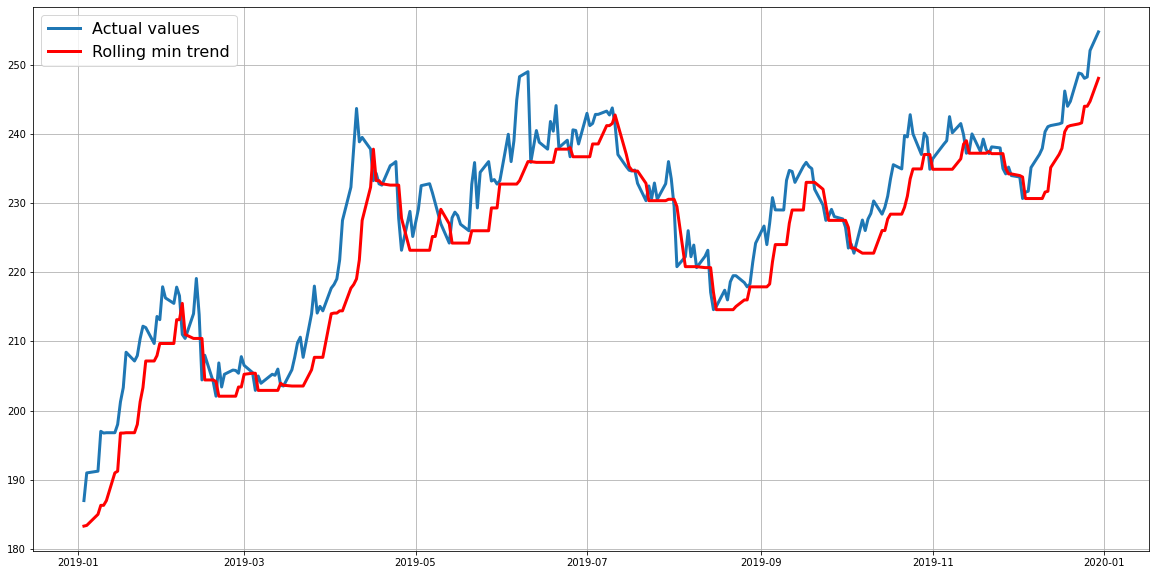

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(rolling_min['2019'], "r", linewidth=3, label="Rolling min trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

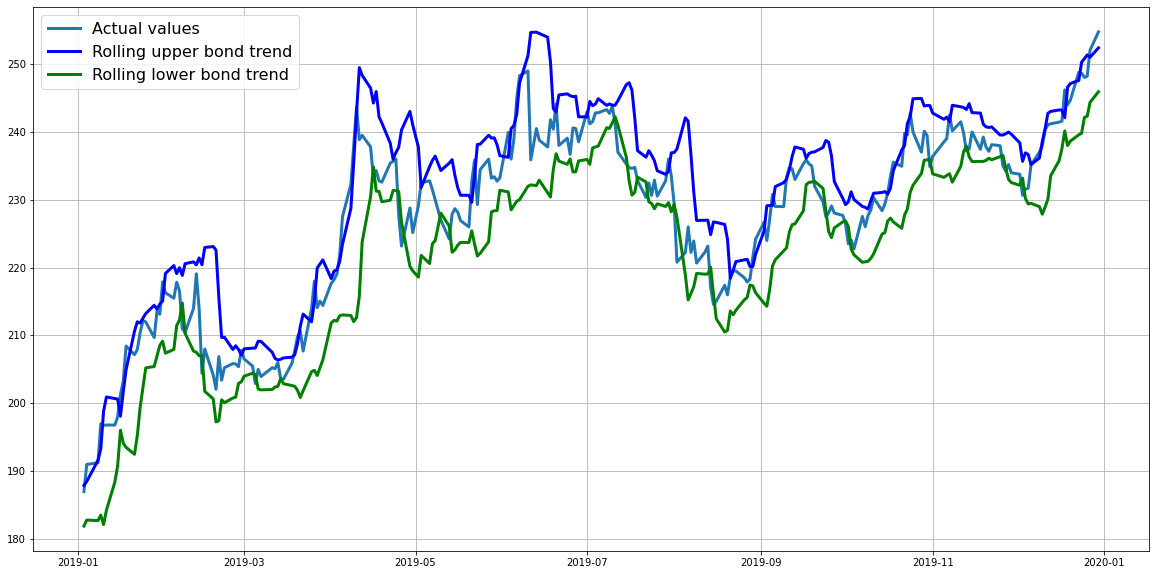

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(ts['2019'], linewidth=3, label="Actual values")
plt.plot(upper_bond['2019'], "b", linewidth=3, label="Rolling upper bond trend")
plt.plot(lower_bond['2019'], "g", linewidth=3, label="Rolling lower bond trend")
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='TRADEDATE'>

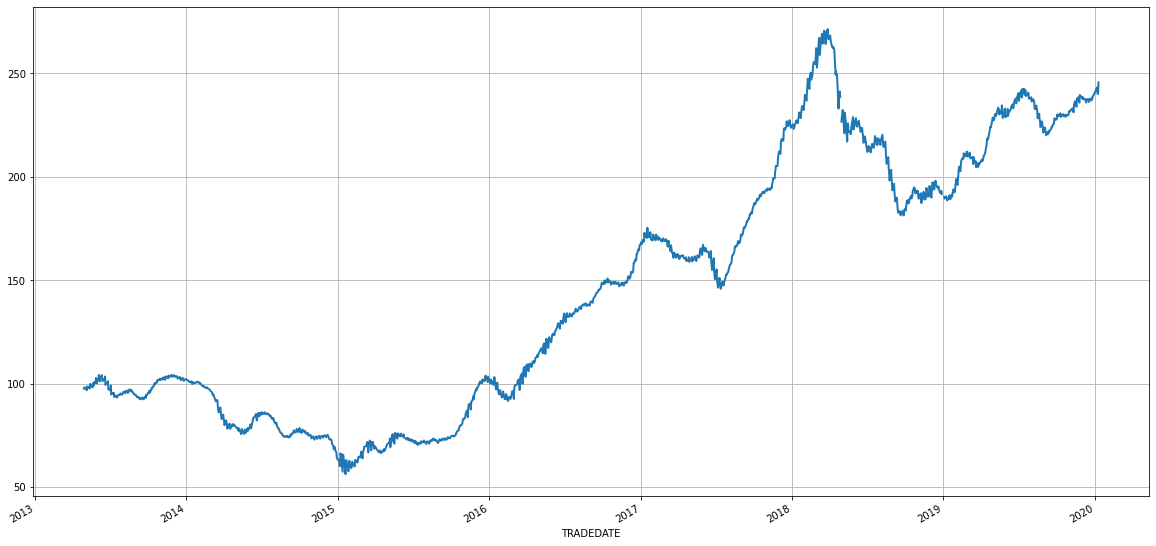

In [34]:
# с группировкой по дням недели

ts = pd.DataFrame(ts)
ts['weekday'] = ts.index.weekday
ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(20, 10), lw=2, grid=True)

<ipython-input-35-76f374a96936>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ts['2019'].CLOSE.expanding().sum().plot(figsize=(20, 10), grid=True, linewidth=3) # расширяющееся окно


<AxesSubplot:xlabel='TRADEDATE'>

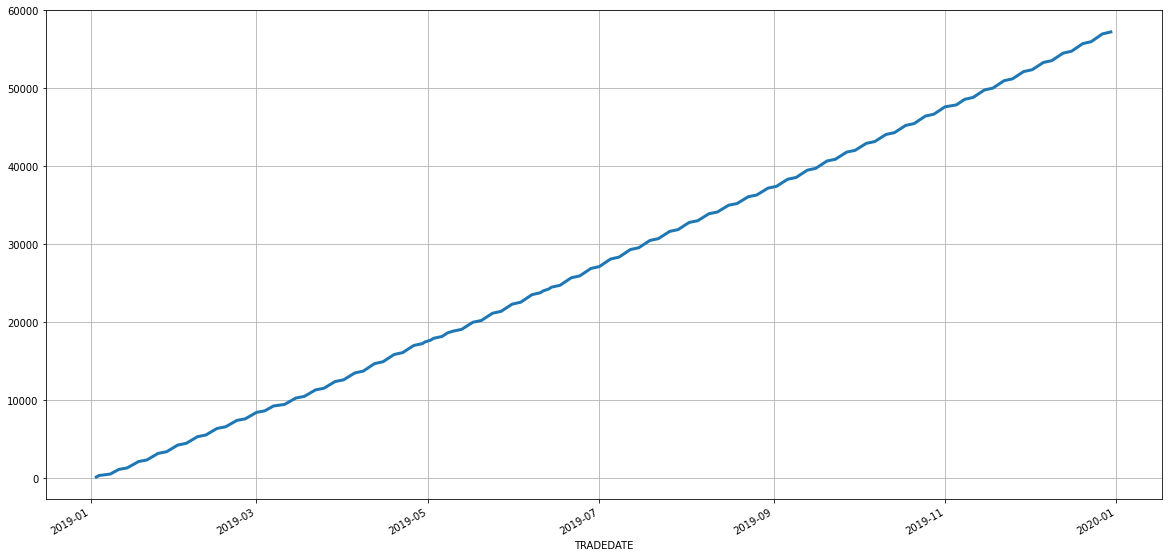

In [35]:
ts['2019'].CLOSE.expanding().sum().plot(figsize=(20, 10), grid=True, linewidth=3) # расширяющееся окно

<ipython-input-36-c2157815ce9f>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ts['2019'].groupby('weekday')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10))


<AxesSubplot:xlabel='TRADEDATE'>

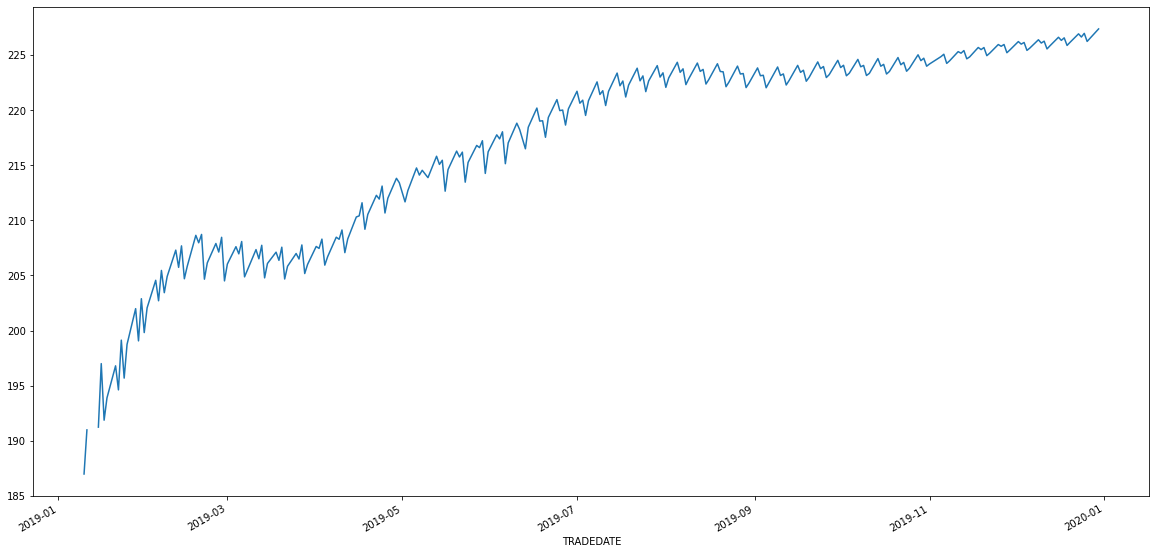

In [36]:
# можно и с группировкой
ts['2019'].groupby('weekday')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1)).plot(figsize=(20, 10))